# Quantitative Bildanalyse
Nach der Segmentierung und Kennzeichnung von Objekten in einem Bild können wir Eigenschaften dieser Objekte messen.

Siehe auch
* [SciPy Vorlesungsnotizen: Messen von Regioneneigenschaften](https://scipy-lectures.org/packages/scikit-image/index.html#measuring-regions-properties)
* [Plot regionprops](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html)

Bevor wir Messungen durchführen können, benötigen wir ein `image` und ein entsprechendes `label_image`. Daher rekapitulieren wir Filtern, Schwellenwertbildung und Kennzeichnung:

In [1]:
from skimage.io import imread
from skimage import filters
from skimage import measure
from pyclesperanto_prototype import imshow
import pandas as pd 
import numpy as np

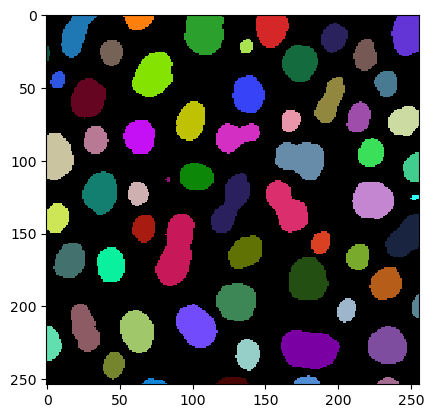

In [2]:
# load image
image = imread("../../data/blobs.tif")

# denoising
blurred_image = filters.gaussian(image, sigma=1)

# binarization
threshold = filters.threshold_otsu(blurred_image)
thresholded_image = blurred_image >= threshold

# labeling
label_image = measure.label(thresholded_image)

# visualization
imshow(label_image, labels=True)

## Messungen / Regioneneigenschaften
Um Eigenschaften von Regionen auszulesen, verwenden wir die Funktion [`regionprops`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops):

In [3]:
# analyse objects
properties = measure.regionprops(label_image, intensity_image=image)

Die Ergebnisse werden als `RegionProps`-Objekte gespeichert, die nicht sehr informativ sind:

In [4]:
properties[0:5]

Wenn Sie daran interessiert sind, welche Eigenschaften wir gemessen haben: Sie sind in der [Dokumentation der Funktion `measure.regionprops`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) aufgelistet. Im Grunde haben wir jetzt eine Variable `properties`, die 40 verschiedene Merkmale enthält. Wir sind jedoch nur an einer kleinen Teilmenge davon interessiert.

Daher können wir die Messungen in ein Wörterbuch umorganisieren, das Arrays mit unseren interessierenden Merkmalen enthält:

In [5]:
statistics = {
    'area':       [p.area               for p in properties],
    'mean':       [p.mean_intensity     for p in properties],
    'major_axis': [p.major_axis_length  for p in properties],
    'minor_axis': [p.minor_axis_length for p in properties]
}

Das Lesen dieser Wörterbücher von Arrays ist nicht sehr bequem. Dafür führen wir [pandas DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) ein, die von Datenwissenschaftlern häufig verwendet werden. "DataFrames" ist nur ein anderer Begriff für "Tabellen", der in Python verwendet wird.

In [8]:
df = pd.DataFrame(statistics)
df

area        mean  major_axis  minor_axis
0    429  191.440559   34.779230   16.654732
1    183  179.846995   20.950530   11.755645
2    658  205.604863   30.198484   28.282790
3    433  217.515012   24.508791   23.079220
4    472  213.033898   31.084766   19.681190
..   ...         ...         ...         ...
57   213  184.525822   18.753879   14.468993
58    79  184.810127   18.287489    5.762488
59    88  182.727273   21.673692    5.389867
60    52  189.538462   14.335104    5.047883
61    48  173.833333   16.925660    3.831678

[62 rows x 4 columns]

Sie können auch benutzerdefinierte Spalten hinzufügen, indem Sie Ihre eigene Metrik berechnen, zum Beispiel das `aspect_ratio`:

In [9]:
df['aspect_ratio'] = [p.major_axis_length / p.minor_axis_length for p in properties]
df

area        mean  major_axis  minor_axis  aspect_ratio
0    429  191.440559   34.779230   16.654732      2.088249
1    183  179.846995   20.950530   11.755645      1.782168
2    658  205.604863   30.198484   28.282790      1.067734
3    433  217.515012   24.508791   23.079220      1.061942
4    472  213.033898   31.084766   19.681190      1.579415
..   ...         ...         ...         ...           ...
57   213  184.525822   18.753879   14.468993      1.296143
58    79  184.810127   18.287489    5.762488      3.173540
59    88  182.727273   21.673692    5.389867      4.021193
60    52  189.538462   14.335104    5.047883      2.839825
61    48  173.833333   16.925660    3.831678      4.417297

[62 rows x 5 columns]

Diese Dataframes können bequem auf der Festplatte gespeichert werden:

In [10]:
df.to_csv("blobs_analysis.csv")

Darüber hinaus kann man Eigenschaften aus unserer `statistics`-Tabelle mit [numpy](https://numpy.org/doc/stable/) messen. Zum Beispiel die durchschnittliche Fläche:

In [11]:
# measure mean area
np.mean(df['area'])

355.3709677419355

## Übungen
Analysieren Sie das geladene `image` der Blobs. 

* Wie viele Objekte sind darin enthalten?

* Wie groß ist das größte Objekt?

* Was sind Mittelwert und Standardabweichung des Bildes?

* Was sind Mittelwert und Standardabweichung der Fläche der segmentierten Objekte?